**SALE ANALYSIS**


**Import libs and dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Task 1: Merge 12 months of sales into a single CSV file**

In [1]:
df_April = pd.read_csv('/content/drive/My Drive/Sales_Data/Sales_April_2019.csv')
df_April

NameError: ignored

In [ ]:
path = '/content/drive/My Drive/Sales_Data'

In [ ]:
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
df = pd.DataFrame()
df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
560545,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301"
560546,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016"
560547,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001"
560548,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301"


In [ ]:
df.to_csv('/content/drive/My Drive/Sales_Data/All_month.csv', index= False)

**Task 2: What is the best month for sales? How much we earn in the best month**

In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
df.rename(columns={'Order ID':'Order_ID', 'Quantity Ordered':'Quantity_Ordered', 'Price Each':'Price_Each', 'Purchase Address':'Purchase_Address', 'Order Date': 'Date'}, inplace = 'True')

In [ ]:
df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Date',
       'Purchase_Address'],
      dtype='object')

In [ ]:
df['Month'] = df['Date'].str[0:2]

In [ ]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Date,Purchase_Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08
...,...,...,...,...,...,...,...
560545,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301",07
560546,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016",07
560547,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001",07
560548,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301",07


**CLEAN UP THE DATASET**

*Clean up the nan*

In [ ]:
df.isnull().sum()

Order_ID            1635
Product             1635
Quantity_Ordered    1635
Price_Each          1635
Date                1635
Purchase_Address    1635
Month               1635
dtype: int64

In [ ]:
na_df = df[df.isna().any(axis = 1)]

In [ ]:
na_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Date,Purchase_Address,Month
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
559215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560420,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(how ='any')

**Drop Or columns**

In [ ]:
df = df[df['Month'] != 'Or']

In [ ]:
df['Month'].unique()

array(['08', '09', '04', '05', '03', '06', '07', '11', '12', '02', '01',
       '10'], dtype=object)

**Continue to solve**

In [ ]:
df['Month']= df['Month'].astype('int32')

In [ ]:
df['Quantity_Ordered'] = df['Quantity_Ordered'].astype('int32')

In [ ]:
df['Price_Each'] = df['Price_Each'].astype('float64')

In [ ]:
df['Sales'] = df['Quantity_Ordered'] * df['Price_Each']

In [ ]:
task2_df = df.groupby('Month')['Sales','Quantity_Ordered'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
months = range(1,13)

Text(0.5, 1.0, 'Chart of Sales in the US')

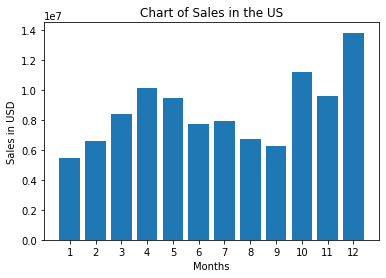

In [ ]:
plt.bar(months, task2_df['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.title('Chart of Sales in the US')

**Task 3. Find the city having the highest number of sales**

**Extract the city in the address column**

In [ ]:
def extract_city(x):
  return x.split(',')[1]

df['City'] = df['Purchase_Address']
df['City'] = df['City'].apply(lambda x : extract_city(x))

In [ ]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Date,Purchase_Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City


**Find the highest**

In [ ]:
task3_df = df.groupby('City')['Sales','Quantity_Ordered'].sum()
task3_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Quantity_Ordered
City,,
Atlanta,8.386496e+06,49806
Austin,5.458745e+06,33459
Boston,1.098493e+07,67584
Dallas,8.303926e+06,50190
Los Angeles,1.635771e+07,99867
New York City,1.399295e+07,83796
Portland,6.961472e+06,42159
San Francisco,2.478661e+07,150717
Seattle,8.243266e+06,49659


In [ ]:
cities = df['City'].unique()


NameError: ignored

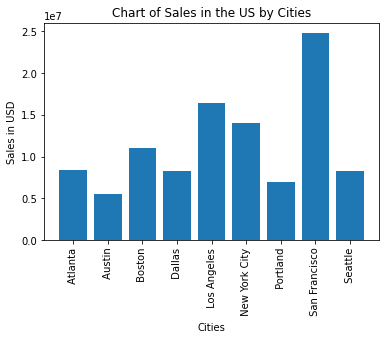

In [ ]:
plt.bar(cities, task3_df['Sales'])
plt.ylabel('Sales in USD')
plt.xticks(rotation = 90)
plt.xlabel('Cities')
plt.title('Chart of Sales in the US by Cities')
plt.show()

**Task 4: What time should we display advertisement to maximize likelihood of customer to by product**

In [ ]:
df['Time'] = df["Date"].str[9:11]

In [ ]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Date,Purchase_Address,Month,Sales,City,Time
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City,19
...,...,...,...,...,...,...,...,...,...,...
560545,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301",7,11.99,Atlanta,16
560546,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016",7,109.99,San Francisco,20
560547,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001",7,2.99,Dallas,22
560548,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301",7,11.99,Austin,19


In [ ]:
task4_df = df.groupby('Time')['Sales', 'Quantity_Ordered'].sum()
task4_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Quantity_Ordered
Time,,
00,2.141164e+06,13284
01,1.382601e+06,7857
02,7.045543e+05,4194
03,4.372737e+05,2784
04,4.879830e+05,2811
05,6.920395e+05,4479
06,1.344339e+06,8430
07,2.234562e+06,13668
08,3.577047e+06,21006


In [ ]:
hours = range(0,24)

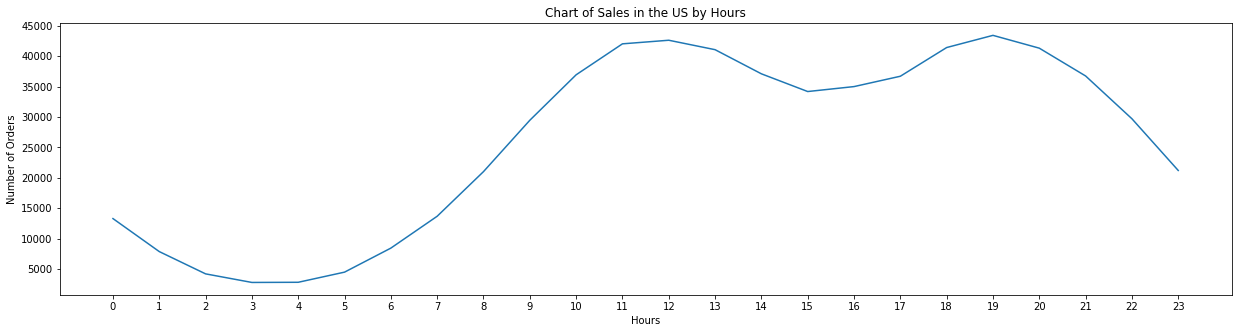

In [ ]:
plt.figure(figsize=(21,5))
plt.plot(hours, task4_df['Quantity_Ordered'])
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel('Hours')
plt.title('Chart of Sales in the US by Hours')
plt.show()

*Soluion 2*

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Hour'] = df.Date.dt.hour

In [ ]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Date,Purchase_Address,Month,Sales,City,Time,Hour
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22,22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15,15
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland,14,14
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20,20
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City,19,19
...,...,...,...,...,...,...,...,...,...,...,...
560545,236665,Wired Headphones,1,11.99,2019-07-20 16:16:00,"694 Meadow St, Atlanta, GA 30301",7,11.99,Atlanta,16,16
560546,236666,20in Monitor,1,109.99,2019-07-31 20:11:00,"866 14th St, San Francisco, CA 94016",7,109.99,San Francisco,20,20
560547,236667,AAA Batteries (4-pack),1,2.99,2019-07-17 22:29:00,"249 Cherry St, Dallas, TX 75001",7,2.99,Dallas,22,22
560548,236668,Wired Headphones,1,11.99,2019-07-30 19:28:00,"727 Wilson St, Austin, TX 73301",7,11.99,Austin,19,19


**Task 5: What product are often sold together**

In [ ]:
df_5 = df[df['Order_ID'].duplicated(keep = False)]

df_5['Grouped'] = df_5.groupby('Order_ID')['Product'].transform(lambda x : ','.join(x))
df_5 = df_5[['Order_ID', 'Grouped']].drop_duplicates()

In [ ]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df_5['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))
print(count)

Counter({('USB-C Charging Cable', 'USB-C Charging Cable'): 66141, ('Lightning Charging Cable', 'Lightning Charging Cable'): 65460, ('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 62355, ('AA Batteries (4-pack)', 'AA Batteries (4-pack)'): 62046, ('Wired Headphones', 'Wired Headphones'): 56961, ('Apple Airpods Headphones', 'Apple Airpods Headphones'): 46863, ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 40218, ('27in FHD Monitor', '27in FHD Monitor'): 22602, ('iPhone', 'iPhone'): 20544, ('27in 4K Gaming Monitor', '27in 4K Gaming Monitor'): 18735, ('34in Ultrawide Monitor', '34in Ultrawide Monitor'): 18606, ('Google Phone', 'Google Phone'): 16602, ('Flatscreen TV', 'Flatscreen TV'): 14454, ('Macbook Pro Laptop', 'Macbook Pro Laptop'): 14199, ('ThinkPad Laptop', 'ThinkPad Laptop'): 12402, ('20in Monitor', '20in Monitor'): 12330, ('Vareebadd Phone', 'Vareebadd Phone'): 6195, ('iPhone', 'Lightning Charging Cable'): 6060, ('Google Phone', 'USB-C Charging Cable'): 5958, (

In [ ]:
count.most_common(10)

[(('USB-C Charging Cable', 'USB-C Charging Cable'), 66141),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 65460),
 (('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)'), 62355),
 (('AA Batteries (4-pack)', 'AA Batteries (4-pack)'), 62046),
 (('Wired Headphones', 'Wired Headphones'), 56961),
 (('Apple Airpods Headphones', 'Apple Airpods Headphones'), 46863),
 (('Bose SoundSport Headphones', 'Bose SoundSport Headphones'), 40218),
 (('27in FHD Monitor', '27in FHD Monitor'), 22602),
 (('iPhone', 'iPhone'), 20544),
 (('27in 4K Gaming Monitor', '27in 4K Gaming Monitor'), 18735)]

**Task6: What product sold the most ? Why do u think that**

In [ ]:
  df_task6 = df.groupby('Product')['Quantity_Ordered', 'Sales'].sum()
  df_task6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Quantity_Ordered,Sales
Product,,
20in Monitor,12387,1.362446e+06
27in 4K Gaming Monitor,18732,7.305293e+06
27in FHD Monitor,22650,3.397274e+06
34in Ultrawide Monitor,18597,7.066674e+06
AA Batteries (4-pack),82905,3.183552e+05
AAA Batteries (4-pack),93051,2.782225e+05
Apple Airpods Headphones,46983,7.047450e+06
Bose SoundSport Headphones,40371,4.036696e+06
Flatscreen TV,14457,4.337100e+06


Text(0.5, 1.0, 'Chart of Product Sales in the US')

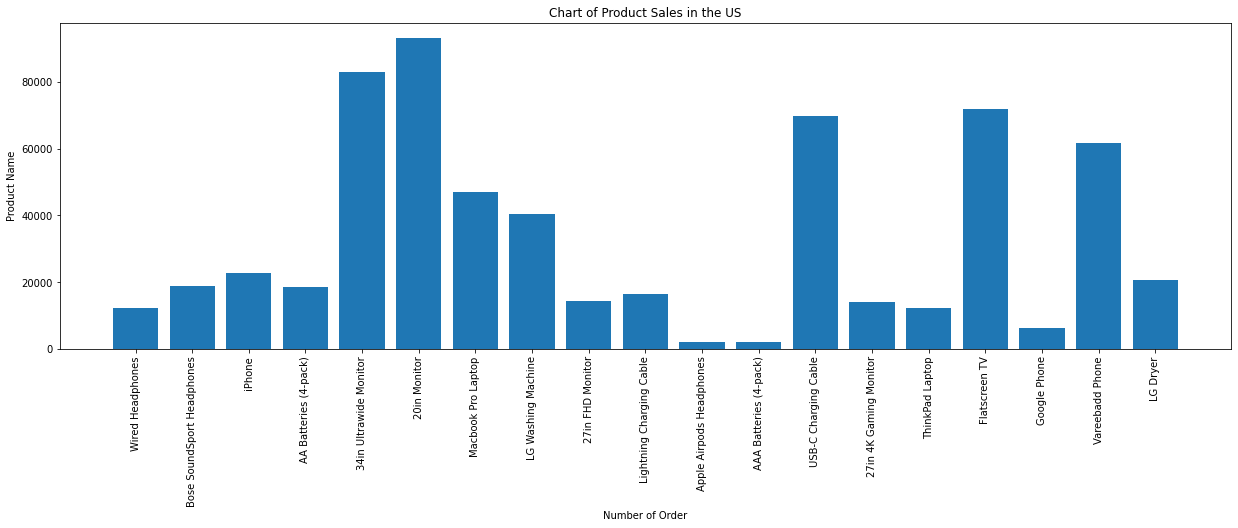

In [ ]:
plt.figure(figsize=(21,6))
products = df['Product'].unique()
plt.bar(products, df_task6['Quantity_Ordered'])
plt.xticks(rotation = 90)
plt.xlabel('Number of Order')
plt.ylabel('Product Name')
plt.title("Chart of Product Sales in the US")